In [1]:
pip install keras

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df=pd.read_csv("mitbih_train.csv",header=None)
test_df=pd.read_csv("mitbih_test.csv",header=None)

In [5]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


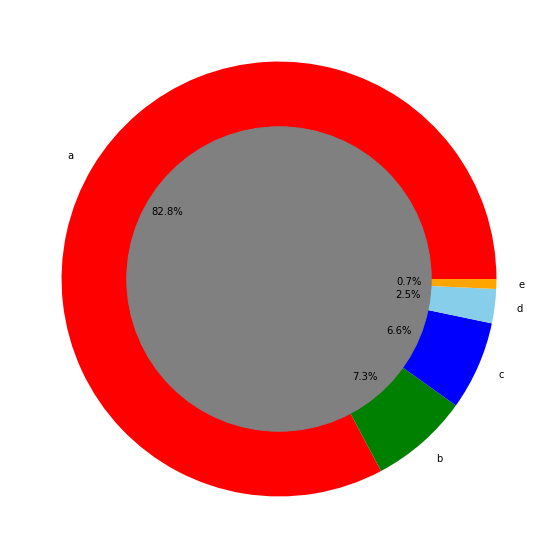

In [6]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='grey')
plt.pie(equilibre, labels=['a','b','c','d','e'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [13]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [14]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


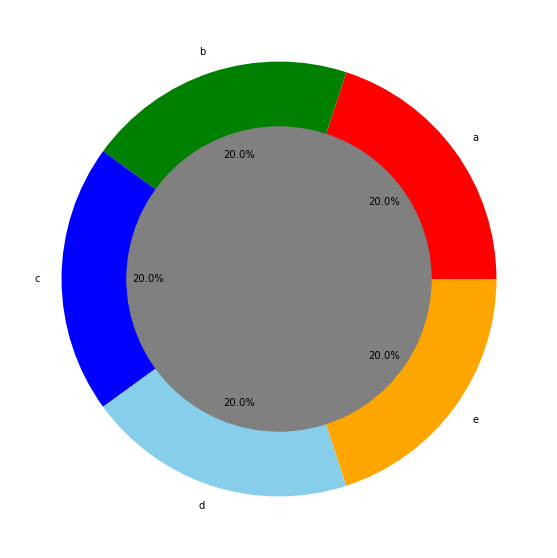

In [15]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='grey')
plt.pie(equilibre, labels=['a','b','c','d','e'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Visualizing types of Arrhythmia

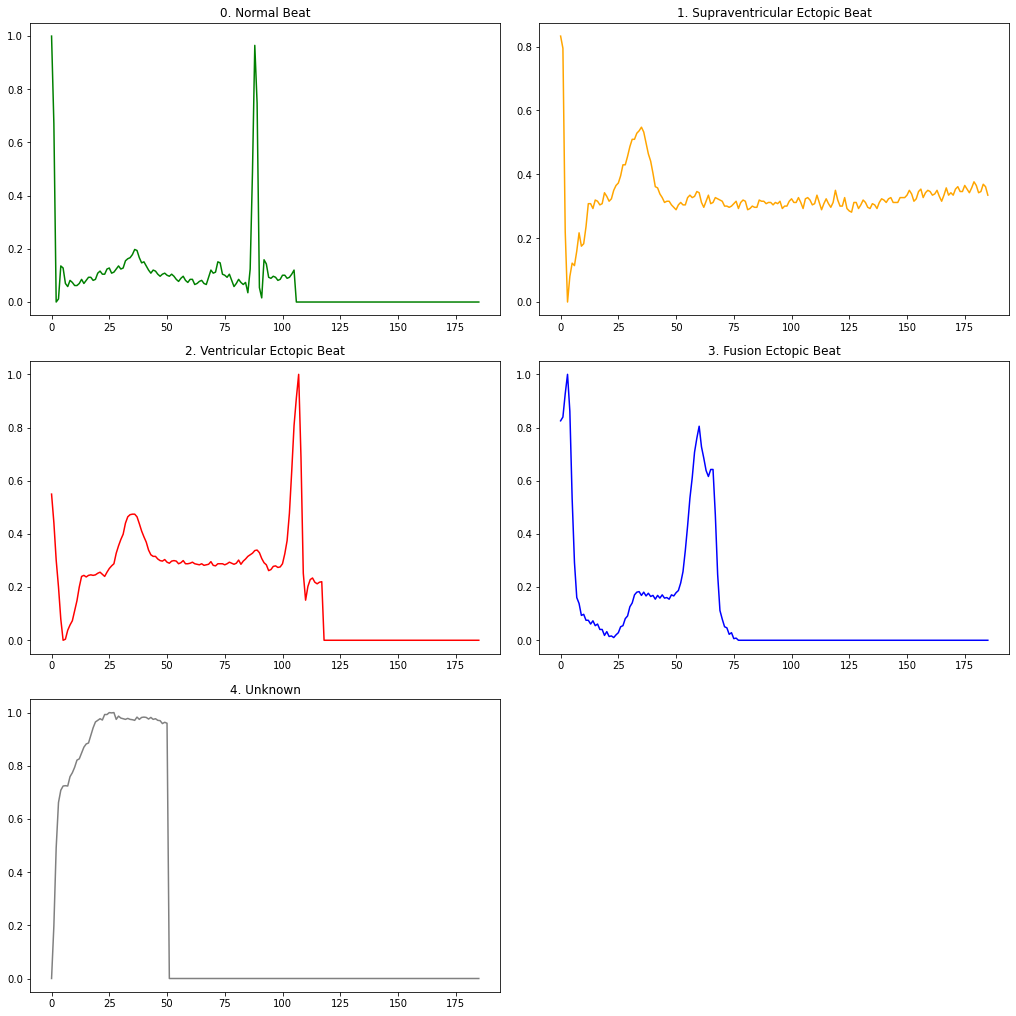

In [40]:
plots= [['Normal Beat','Supraventricular Ectopic Beat'], ['Ventricular Ectopic Beat', 'Fusion Ectopic Beat'], ['Unknown']]
colors= [['green', 'orange'], ['red', 'blue'], ['grey']]
fig, axs = plt.subplots(3, 2, constrained_layout=True, figsize=(14,14))
fig.delaxes(axs[2,1])

for i in range(0,5,2):
    j=i//2
    axs[j][0].plot(train_df[train_df[187]==i%5].sample(1, random_state=100).iloc[0,:186], colors[j][0])
    axs[j][0].set_title('{}. {}'.format(i%5,plots[j][0]))
    
    if i%5!=4:
        axs[j][1].plot(train_df[train_df[187]==(i%5)+1].sample(1, random_state=100).iloc[0,:186], colors[j][1])
        axs[j][1].set_title('{}. {}'.format(i%5+1,plots[j][1]))

In [16]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [17]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
60742,0.951027,0.922591,0.527646,0.044234,0.000000,0.219589,0.330174,0.360190,0.369668,0.368088,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
73348,0.968750,0.941406,0.439453,0.068359,0.062500,0.091797,0.099609,0.095703,0.093750,0.082031,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1
76862,0.541528,0.485050,0.299003,0.000000,0.006645,0.066445,0.086379,0.099668,0.126246,0.112957,...,0.365449,0.358804,0.358804,0.33887,0.318937,0.325581,0.315615,0.315615,0.318937,2
80772,1.000000,0.863757,0.587302,0.251323,0.079365,0.117725,0.107143,0.063492,0.060847,0.054233,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3
83409,0.627010,0.514469,0.472669,0.466238,0.443730,0.405145,0.350482,0.273312,0.160772,0.086817,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4


In [29]:
#I am using a fonction ( will depend of the version) where i add a noise to the data to generilize my train.
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

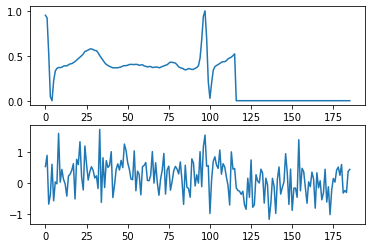

In [30]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [31]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [32]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

# Network

In [33]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [34]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [36]:
pip install BatchNormalization

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement BatchNormalization
ERROR: No matching distribution found for BatchNormalization


# Training Model

In [37]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 59s 18ms/step - loss: 0.9005 - accuracy: 0.6531 - val_loss: 0.9191 - val_accuracy: 0.7384
Epoch 2/40
3125/3125 [==============================] - 61s 20ms/step - loss: 0.7953 - accuracy: 0.6997 - val_loss: 0.6831 - val_accuracy: 0.8147
Epoch 3/40
3125/3125 [==============================] - 61s 20ms/step - loss: 0.7641 - accuracy: 0.7114 - val_loss: 1.1540 - val_accuracy: 0.7081
Epoch 4/40
3125/3125 [==============================] - 58s 19ms/step - loss: 0.7388 - accuracy: 0.7198 - val_loss: 1.5360 - val_accuracy: 0.2909
Epoch 5/40
3125/3125 [==============================] - 59s 19ms/step - loss: 0.7141 - accuracy: 0.7308 - val_loss: 0.9991 - val_accuracy: 0.6354
Epoch 6/40
3125/3125 [==============================] - 59s 19ms/step - loss: 0.6897 - accuracy: 0.7386 - val_loss: 0.9975 - val_accuracy: 0.6389
Epoch 7/40
3125/3125 [==============================] - 59s 19ms/step - loss: 0.6634 - accuracy: 0.7502 - val_loss: 0.9361 -

Accuracy: 81.47%


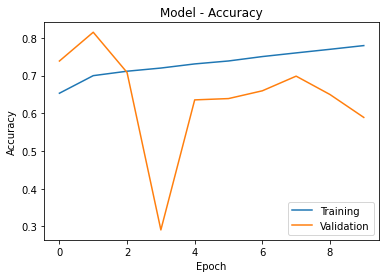

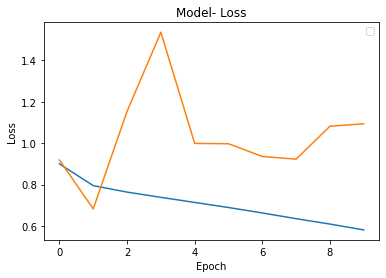

In [41]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


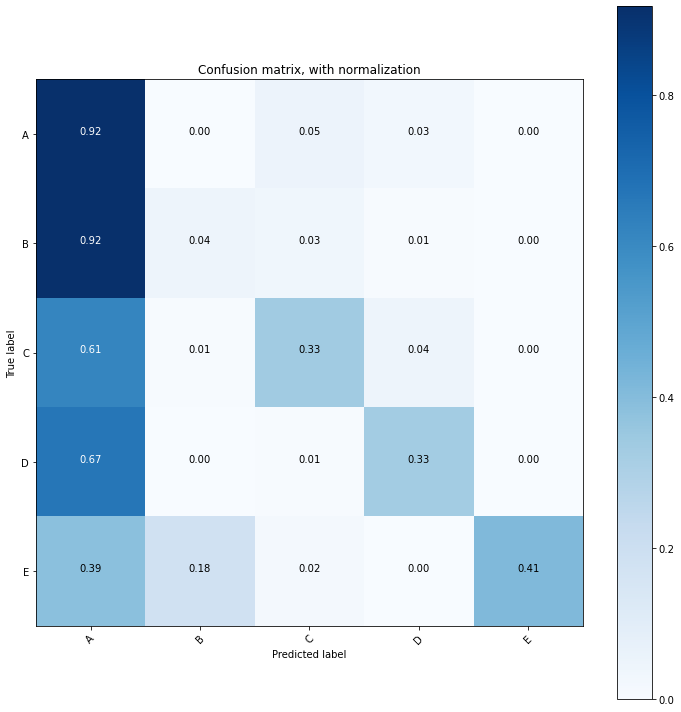

In [42]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['A', 'B', 'C', 'D', 'E'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()